# Data Analysis

In [27]:
# Imports 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

In [28]:
# Load the data
data = pd.read_csv('../data\owid-co2-data.csv')
data = data.dropna(subset=['co2'])

In [29]:
# Find correlation between columns
numeric_df = data.select_dtypes(include='number')
correlation = numeric_df.corr()
numeric_df.head()

,year,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
99,1949,7356890.0,NaN,0.0,0.0,0.015,NaN,NaN,6.268,NaN,...,NaN,0.125,0.0,0.0,0.000,0.0,NaN,NaN,NaN,NaN
100,1950,7480464.0,9.421400e+09,0.0,0.0,0.084,0.070,475.000,7.370,1.102,...,NaN,0.125,0.0,0.0,0.001,0.0,NaN,NaN,NaN,NaN
101,1951,7571542.0,9.692280e+09,0.0,0.0,0.092,0.007,8.696,8.232,0.861,...,NaN,0.125,0.0,0.0,0.001,0.0,NaN,NaN,NaN,NaN
102,1952,7667534.0,1.001733e+10,0.0,0.0,0.092,0.000,0.000,9.183,0.951,...,NaN,0.125,0.0,0.0,0.001,0.0,NaN,NaN,NaN,NaN
103,1953,7764549.0,1.063052e+10,0.0,0.0,0.106,0.015,16.000,10.256,1.073,...,NaN,0.125,0.0,0.0,0.001,0.0,NaN,NaN,NaN,NaN


In [30]:
# Display the correlation matrix
correlation_matrix = numeric_df.corr()

columns_of_interest = ['co2', 'gdp', 'population', 'cumulative_co2']  
correlation_matrix_filtered = numeric_df[columns_of_interest].corr()

fig = px.imshow(correlation_matrix_filtered, text_auto=True, labels=dict(color='Correlation'))
fig.update_layout(title='Filtered Correlation Matrix Heatmap', width=800, height=600)
fig.update_xaxes(tickangle=45)
fig.show()

In [31]:
# Select relevant columns for correlation
correlation_data = data[['gdp', 'population', 'co2', 'cumulative_co2', "total_ghg"]]
correlation_data = correlation_data.dropna()
correlation_matrix = correlation_data.corr()
correlation_matrix

,gdp,population,co2,cumulative_co2,total_ghg
gdp,1.000000,0.938576,0.977784,0.977087,0.981821
population,0.938576,1.000000,0.942418,0.887566,0.959142
co2,0.977784,0.942418,1.000000,0.964965,0.994183
cumulative_co2,0.977087,0.887566,0.964965,1.000000,0.961094
total_ghg,0.981821,0.959142,0.994183,0.961094,1.000000


In [32]:
# Select only numerical columns for correlation calculation
numerical_data = data.select_dtypes(include=['number'])
correlation_matrix_all_numeric = numerical_data.corr()
correlation_matrix_all_numeric

,year,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
year,1.000000,0.016694,0.077085,0.102981,0.312224,0.142780,0.046398,-0.009721,0.076471,0.010471,...,-0.726284,-0.144622,0.114512,0.104595,0.107659,0.124432,0.029292,0.031849,0.006132,0.065105
population,0.016694,1.000000,0.907211,0.802239,0.037464,0.842332,0.502810,-0.004865,0.908075,0.348481,...,0.590498,0.733955,0.938947,0.848382,0.882347,0.887376,0.945264,0.934036,-0.314998,-0.124726
gdp,0.077085,0.907211,1.000000,0.912824,0.077386,0.965254,0.311429,-0.002278,0.948413,0.171332,...,0.395960,0.673518,0.958481,0.959956,0.966770,0.976299,0.981821,0.980726,-0.070153,-0.056733
cement_co2,0.102981,0.802239,0.912824,1.000000,0.150730,0.890979,0.482679,-0.003283,0.853730,0.313276,...,0.405180,0.461275,0.853453,0.792499,0.818248,0.830563,0.917280,0.921456,-0.394426,-0.107764
cement_co2_per_capita,0.312224,0.037464,0.077386,0.150730,1.000000,0.141605,0.064110,-0.009446,0.096567,0.033119,...,-0.296477,-0.010834,0.089212,0.101050,0.099593,0.097290,0.091824,0.100188,-0.030735,-0.167459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
temperature_change_from_n2o,0.124432,0.887376,0.976299,0.830563,0.097290,0.962422,0.426666,-0.005000,0.953415,0.271134,...,0.502179,0.648452,0.970138,0.979878,0.987359,1.000000,0.977841,0.976756,-0.033170,-0.125654
total_ghg,0.029292,0.945264,0.981821,0.917280,0.091824,0.990723,0.465489,-0.012550,0.996540,0.295555,...,0.937712,0.972065,0.988881,0.967910,0.983109,0.977841,1.000000,0.997862,-0.182024,-0.117277
total_ghg_excluding_lucf,0.031849,0.934036,0.980726,0.921456,0.100188,0.996811,0.461929,-0.013050,0.996665,0.292195,...,0.943873,0.970249,0.981426,0.970729,0.983015,0.976756,0.997862,1.000000,-0.171555,-0.113502
trade_co2,0.006132,-0.314998,-0.070153,-0.394426,-0.030735,-0.130611,-0.357979,-0.038052,-0.180992,-0.227191,...,-0.259807,-0.053840,-0.207706,0.000514,-0.056494,-0.033170,-0.182024,-0.171555,1.000000,0.143160


## Predicting greenhouse emissions in the next 3 months

### Using ARIMA model

Duplicates found in the date column:
            date  year  total_ghg  monthly_emissions
0     1990-01-01  1990      9.240           0.770000
1     1990-01-01  1990   2688.740         224.061667
2     1990-01-01  1990     11.370           0.947500
3     1990-01-01  1990    122.880          10.240000
4     1990-01-01  1990      0.430           0.035833
...          ...   ...        ...                ...
76123 2020-12-01  2020    458.140          38.178333
76124 2020-12-01  2020  47513.148        3959.429000
76125 2020-12-01  2020     24.390           2.032500
76126 2020-12-01  2020     91.190           7.599167
76127 2020-12-01  2020    113.200           9.433333

[76128 rows x 4 columns]

ARIMA Forecast for the Next 3 Months (Jan-Mar 2023):
2023-01-01    2.605833
2023-02-01    2.605833
2023-03-01    2.605833
Freq: MS, Name: predicted_mean, dtype: float64


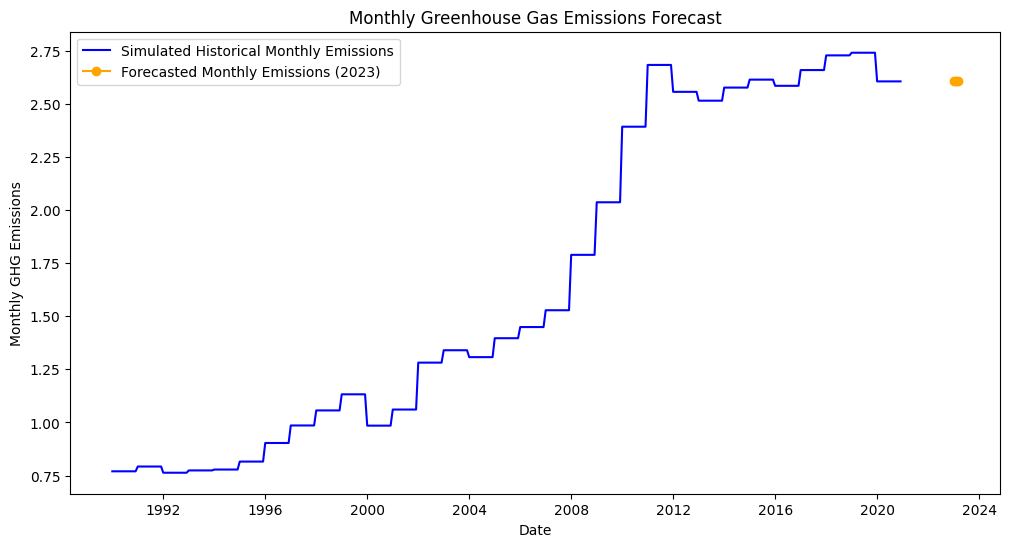

In [33]:
# Select the relevant columns and drop rows with missing 'total_ghg' values
annual_data = data[['year', 'total_ghg']].dropna()

# Generate a monthly date range covering the years in the dataset
monthly_data = pd.DataFrame({
    'date': pd.date_range(start=f"{annual_data['year'].min()}-01-01", 
                          end=f"{annual_data['year'].max()}-12-01", freq='MS')
})
monthly_data['year'] = monthly_data['date'].dt.year

# Merge annual emissions data onto the monthly data
monthly_data = monthly_data.merge(annual_data, on='year', how='left')
monthly_data['monthly_emissions'] = monthly_data['total_ghg'] / 12

duplicates = monthly_data[monthly_data.duplicated(subset=['date'], keep=False)]
if not duplicates.empty:
    print("Duplicates found in the date column:")
    print(duplicates)

monthly_data = monthly_data.drop_duplicates(subset=['date'])

# Set 'date' as the index for the time series and ensure it has a monthly frequency
monthly_data.set_index('date', inplace=True)
monthly_data = monthly_data.asfreq('MS')  # Set the frequency to monthly

arima_model = ARIMA(monthly_data['monthly_emissions'], order=(1,1,1))
arima_fitted = arima_model.fit()

forecast_months = 3
monthly_forecast = arima_fitted.forecast(steps=forecast_months)

# Adjust the index of the forecast to reflect January, February, and March of 2023
forecast_index = pd.date_range(start='2023-01-01', periods=forecast_months, freq='MS')
monthly_forecast.index = forecast_index

print("\nARIMA Forecast for the Next 3 Months (Jan-Mar 2023):")
print(monthly_forecast)

plt.figure(figsize=(12, 6))
plt.plot(monthly_data['monthly_emissions'], label='Simulated Historical Monthly Emissions', color='blue')
plt.plot(monthly_forecast.index, monthly_forecast, label='Forecasted Monthly Emissions (2023)', color='orange', marker='o')
plt.xlabel('Date')
plt.ylabel('Monthly GHG Emissions')
plt.title('Monthly Greenhouse Gas Emissions Forecast')
plt.legend()
plt.show()

### Using Exponential Smoothing

In [34]:
ets_model = ExponentialSmoothing(monthly_data['monthly_emissions'], trend='add', seasonal=None)
ets_fitted = ets_model.fit()

# Forecast next 3 months
forecast_months = 3
ets_forecast = ets_fitted.forecast(steps=forecast_months)

# Adjust the index of the forecast to reflect January, February, and March of 2023
forecast_index = pd.date_range(start=monthly_data.index[-1] + pd.DateOffset(months=1), periods=forecast_months, freq='MS')
ets_forecast.index = forecast_index

print("\nETS Forecast for the Next 3 Months (Jan-Mar 2023):")
print(ets_forecast)


ETS Forecast for the Next 3 Months (Jan-Mar 2023):
2021-01-01    2.610880
2021-02-01    2.615832
2021-03-01    2.620784
Freq: MS, dtype: float64


### Using Machine Learning Polynomial Regression

In [35]:
# Prepare the data for Linear Regression
monthly_data['time'] = np.arange(len(monthly_data))
X = monthly_data[['time']]
y = monthly_data['monthly_emissions']

poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X, y)
future_times_poly = pd.DataFrame({'time': np.arange(len(monthly_data), len(monthly_data) + 3)})
poly_forecast = poly_model.predict(future_times_poly)

print("\nPolynomial Regression Forecast for the Next 3 Months:")
print(poly_forecast)


Polynomial Regression Forecast for the Next 3 Months:
[3.07919296 3.08845811 3.09773673]


## Evaluating the models using RMSE and MAE

In [36]:
# Calculate RMSE and MAE for ARIMA, ETS, and Linear Regression models

# ARIMA
arima_rmse = np.sqrt(((monthly_data['monthly_emissions'] - arima_fitted.fittedvalues) ** 2).mean())
arima_mae = np.abs(monthly_data['monthly_emissions'] - arima_fitted.fittedvalues).mean()

# ETS
ets_rmse = np.sqrt(((monthly_data['monthly_emissions'] - ets_fitted.fittedvalues) ** 2).mean())
ets_mae = np.abs(monthly_data['monthly_emissions'] - ets_fitted.fittedvalues).mean()

# Poly Regression
lr_rmse = np.sqrt(((monthly_data['monthly_emissions'] - poly_model.predict(X)) ** 2).mean())
lr_mae = np.abs(monthly_data['monthly_emissions'] - poly_model.predict(X)).mean()

print("\nModel Evaluation Metrics:")
print(f"ARIMA RMSE: {arima_rmse:.2f}, MAE: {arima_mae:.2f}")
print(f"ETS RMSE: {ets_rmse:.2f}, MAE: {ets_mae:.2f}")
print(f"Linear Regression RMSE: {lr_rmse:.2f}, MAE: {lr_mae:.2f}")


Model Evaluation Metrics:
ARIMA RMSE: 0.05, MAE: 0.01
ETS RMSE: 0.04, MAE: 0.01
Linear Regression RMSE: 0.20, MAE: 0.15


## Comparing the predictions

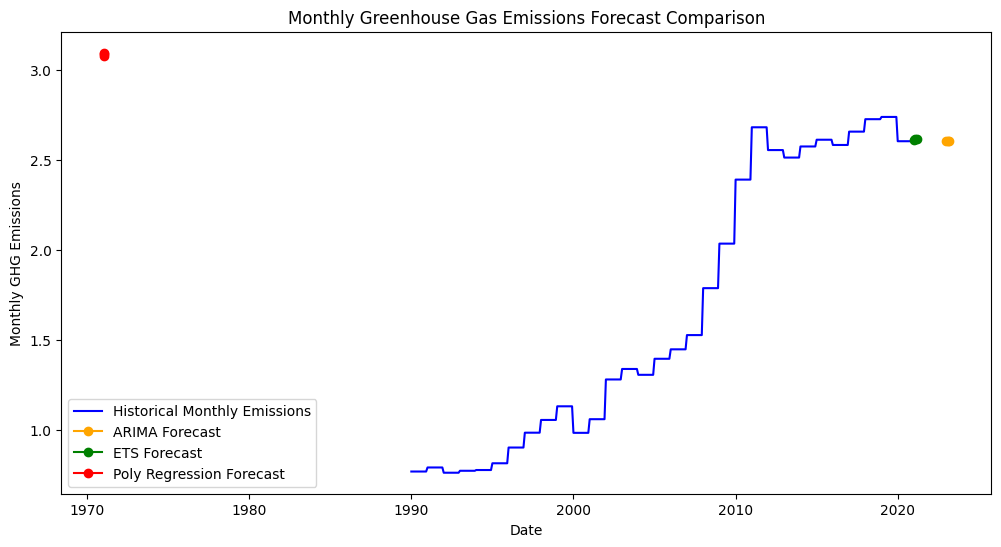

In [37]:
# Compare the predictions from ARIMA, ETS, and Linear Regression models
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['monthly_emissions'], label='Historical Monthly Emissions', color='blue')
plt.plot(monthly_forecast.index, monthly_forecast, label='ARIMA Forecast', color='orange', marker='o')
plt.plot(ets_forecast.index, ets_forecast, label='ETS Forecast', color='green', marker='o')
plt.plot(future_times_poly, poly_forecast, label='Poly Regression Forecast', color='red', marker='o')
plt.xlabel('Date')
plt.ylabel('Monthly GHG Emissions')
plt.title('Monthly Greenhouse Gas Emissions Forecast Comparison')
plt.legend()
plt.show()

## Annual forecast for greenhouse gas emissions 

C:\5. Semester\Maskinlæring\Assignment 1\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

C:\5. Semester\Maskinlæring\Assignment 1\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

C:\5. Semester\Maskinlæring\Assignment 1\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

C:\5. Semester\Maskinlæring\Assignment 1\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results w

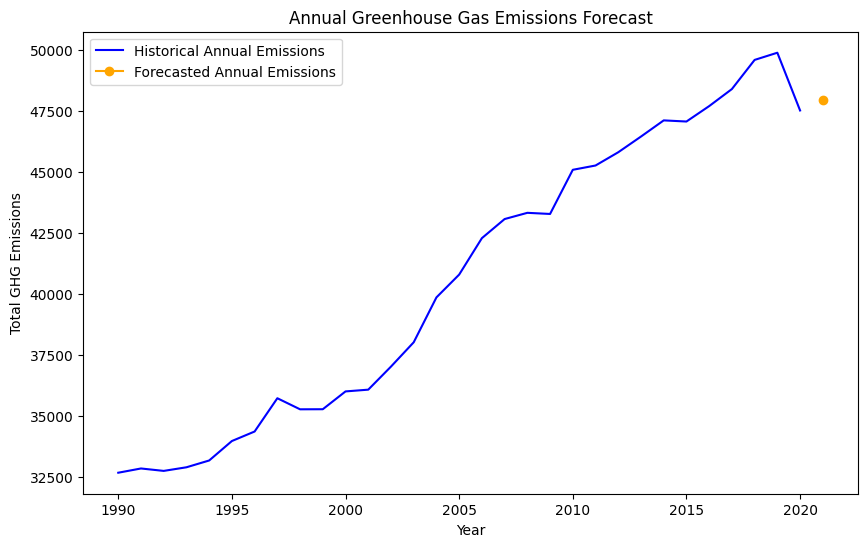

Annual Forecast for the Next Year:
31    47925.484052
dtype: float64


In [38]:
# Forecasting annual greenhouse gas emissions
country_data = data[data['country'] == 'World']
country_data = country_data[['year', 'total_ghg']].dropna()
country_data.set_index('year', inplace=True)

# Fit an ARIMA model on the filtered or aggregated annual data
arima_model = ARIMA(country_data['total_ghg'], order=(1,1,1))
arima_fitted = arima_model.fit()

# Forecast the next year
forecast_years = 1
annual_forecast = arima_fitted.forecast(steps=forecast_years)

# Plot the historical data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(country_data, label='Historical Annual Emissions', color='blue')
plt.plot([country_data.index[-1] + 1], annual_forecast, label='Forecasted Annual Emissions', color='orange', marker='o')
plt.xlabel('Year')
plt.ylabel('Total GHG Emissions')
plt.title('Annual Greenhouse Gas Emissions Forecast')
plt.legend()
plt.show()

print("Annual Forecast for the Next Year:")
print(annual_forecast)